# Tweet-Clustering: TF-IDF

In [2]:
import numpy as np
import pandas as pd
import imp
import lexrank
from matplotlib import pyplot as plt
from data_providers import DummyDataProvider, CachedSmallDataProvider
from clustering import DummyClustering, KMeansClustering, KMeansClusteringNew
from preprocessors import DummyPreprocessor, Cleaner
from vectorizers import DummyVectorizer, FastTextMeanVectorizer, FastTextTfIdfMeanVectorizer, TfIdfVectorizer, ElmoVectorizer
from sentiment import VaderSentimentAnalyser
from labeler import LexRankSummarizer
import utils
import random

In [3]:
dataProvider1 = CachedSmallDataProvider("iphone")
tweets1 = dataProvider1.load_data()
tweets1[:1]

['Create awesome custom faces for your #AppleWatch. Download AWC Faces #iphone #app https://t.co/ctiK1X9Kda']

In [4]:
# 1. DATA
dataProvider2 = CachedSmallDataProvider("alexa")
tweets2 = dataProvider2.load_data()
print("number ", len(tweets2))
tweets2[:1]

number  5469


['He’s so #beautiful love him! 🌸📚💕 #ariemanuel #mymollydoll #blog Thanks for following everyone! We are currently 8.3k share a following with @sassique where I’m a member and Ranked 37,818 in the #US on #Alexa // #blogger #blog #website @WMEBooks #thoughts 📖 https://t.co/m2RitarZYP']

In [5]:
# DATA
dataProvider3 = CachedSmallDataProvider("brexit")
tweets3 = dataProvider3.load_data()
print("number ", len(tweets3))
tweets3[:1]

number  71827


["Hey @tracey_crouch @TomTugendhat  Is this one of those #Brexit divedends for Kent we've been hearing so much about? https://t.co/hT85eKXHZz"]

In [6]:
# DATA
dataProvider4 = CachedSmallDataProvider("baseball")
tweets4 = dataProvider4.load_data()
print("number ", len(tweets4))
tweets4[:1]

number  3739


['Hey @MLB how about some justice for @PeteRose_14 he did nothing compared to the @astros #baseball']

In [7]:
# DATA
dataProvider5 = CachedSmallDataProvider("iran")
tweets5 = dataProvider5.load_data()
print("number ", len(tweets5))
tweets5[:1]

number  35167


['Can the #US bomb #Iran? Defense chief #Esper says no, then changes mind  https://t.co/avZn4sg8tt https://t.co/zLvik6fv87']

In [8]:
# DATA
dataProvider6 = CachedSmallDataProvider("trump")
tweets6 = dataProvider6.load_data()
print("number ", len(tweets6))
tweets6[:1]
# Result 22 clusters (sa) - highly polarized

number  34991


['@Farcethemusic And I say... 🎶 “let’s Build A Wall around the White House &amp; then let’s lock him up”https://t.co/UAYJTZQCff #CountryMusic #Country #Nashville #POTUS #Trump #BananaRepublic #2020Election #AbuseOfPower #Americana #25thAmendmentNow #AltFolk #NewMusicAlert #NewMusic #Ukrainegate']

In [9]:
#merge tweets
tweets = tweets1 
#random.shuffle(tweets)

In [10]:
# needs reduction
tweets = tweets[:1000]

In [11]:
# create dataframe
dfTweet = pd.DataFrame({"tweets":tweets})
dfTweet["clean_tweets"] = ""
dfTweet["hashTags"] = ""
dfTweet["at"] = ""

In [12]:
cleaner = Cleaner()


In [13]:
# B. Tweet-Pipe
# does various clean up-jobs
vocabDicFreq, vocabDic,clean_tweets = cleaner.clean_tweets(tweets, 2 )
dfTweet['clean_tweets'] = clean_tweets
print(clean_tweets[0])

create awesome faces applewatch download faces iphone app


In [14]:
# test cleaning and vocab
print(clean_tweets[:1])

['create awesome faces applewatch download faces iphone app']


# TF_IDF CLUSTERING ON FULL TWEET

In [15]:
# Strand 1: TF IDF
print("--- tf idf mode ----")
# preVectorize
preVectorizer = TfIdfVectorizer()
X, docSparseTfIdf, vocabDic = preVectorizer.vectorizeFast(clean_tweets)
# test tfidf vectors
print("Tf-IDF Sparse Vectors shape")
print(len(docSparseTfIdf[0]))
print(len(docSparseTfIdf))


--- tf idf mode ----
Tf-IDF Sparse Vectors shape
1083
1000


In [16]:
# setting for kmeans clustering n-cluster min and max
min = 2
max = 66

In [17]:
# 2.A. Determina optimal number of cluster - other method - with hashtags - only 2/3s due to duplicates can be checked
# DIFFERENT SETTINGS FOR optimal number of clusters i.e. init="k-means++", max_iter etc. pp.
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score
clusterer = KMeansClusteringNew()
min = 2
max = 66
SA = {}
CH = {}
DB = {}
vecs = X.toarray()
for index in range(min, max):
    cluster_labels = clusterer.cluster(vecs, index)
    SA[index] = silhouette_score(vecs, cluster_labels)
    CH[index] = calinski_harabasz_score(vecs, cluster_labels)
    DB[index] = davies_bouldin_score(vecs, cluster_labels)

# find minimum and Maximum
sortedSA = {k: v for k, v in sorted(SA.items(), key=lambda item: item[1], reverse=True)}
bestSAIndex = next(iter(sortedSA))
print(" SA best ", bestSAIndex, " : ", SA[bestSAIndex] )
sortedSA = {k: v for k, v in sorted(SA.items(), key=lambda item: item[1], reverse=False)}
worstSAIndex = next(iter(sortedSA))
print(" SA worst ", worstSAIndex, " : ", SA[worstSAIndex] )
#print("SA", pd.Series(list(SA.values())).describe().T)
# ++++++++++++++++++++++++++++++++++++++
sortedCH = {k: v for k, v in sorted(CH.items(), key=lambda item: item[1], reverse=True)}
bestCHIndex = next(iter(sortedCH))
print(" CH best ", bestCHIndex, " : ", CH[bestCHIndex] )
sortedCH = {k: v for k, v in sorted(CH.items(), key=lambda item: item[1], reverse=False)}
worstCHIndex = next(iter(sortedCH))
print(" CH worst ", worstCHIndex, " : ", CH[worstCHIndex] )
#print("CH", pd.Series(list(CH.values())).describe().T)
# +++++++++++++++++++++++++++++++++++++++++
sortedDB = {k: v for k, v in sorted(DB.items(), key=lambda item: item[1], reverse=False)}
bestDBIndex = next(iter(sortedDB))
print(" DB best ", bestDBIndex, " : ", DB[bestDBIndex] )
sortedDB = {k: v for k, v in sorted(DB.items(), key=lambda item: item[1], reverse=True)}
worstDBIndex = next(iter(sortedDB))
print(" DB worst ", worstDBIndex, " : ", DB[worstDBIndex] )
#print("DB", pd.Series(list(DB.values())).describe().T)

# ++++++++++++++ create mixed ranking
print("joint ranking")
from sklearn.preprocessing import MinMaxScaler
Ranking = {}
for index in range(min, max):
    Ranking[index] = SA[index]/SA[bestSAIndex] + CH[index]/CH[bestCHIndex] - DB[index]/DB[worstDBIndex]
    #print(Ranking[index])
sortedRanking = {k: v for k, v in sorted(Ranking.items(), key=lambda item: item[1], reverse=True)}
count = 10
for key, value in sortedRanking.items():
    count -=1
    print(key, " ", value, " Silhouette ", SA[key])
    if count == 0:
        break

 SA best  46  :  0.11132157939461433
 SA worst  9  :  -0.008798790923297755
 CH best  3  :  20.45805221826216
 CH worst  62  :  3.9324073385837393
 DB best  63  :  1.2756360014463666
 DB worst  2  :  9.02827539734777
joint ranking
46   1.0883415455822774  Silhouette  0.11132157939461433
47   1.0453712975710998  Silhouette  0.10947001956144128
65   1.0096953776900044  Silhouette  0.10926181237644415
40   0.9879472199642431  Silhouette  0.10034943273238742
39   0.966037863171662  Silhouette  0.0991263646338462
44   0.9657278988209416  Silhouette  0.10129397779848741
29   0.9634721678644133  Silhouette  0.0916527747619772
54   0.9571991486132856  Silhouette  0.10341678605484472
32   0.9545778557017486  Silhouette  0.09695265853347129
30   0.9520212945898126  Silhouette  0.09399320623981058


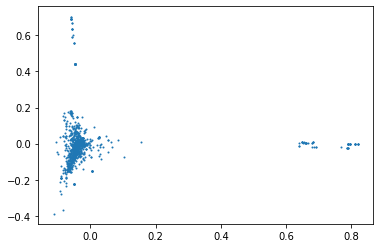

In [18]:
# graph
print()
utils.scatter2d(X.toarray())


In [19]:
cluster_optimal_number = 60

In [20]:
# cluster assignement numbers
cluster_assignments = clusterer.cluster(X, cluster_optimal_number)
print( "cluster assignments: ")
clusterCount = pd.Series(cluster_assignments).value_counts()
print(clusterCount.describe().T)
print(clusterCount)
dict = {'cluster':cluster_assignments, 'tweets':clean_tweets}

cluster assignments: 
count     59.000000
mean      16.949153
std       50.158172
min        1.000000
25%        3.000000
50%        6.000000
75%       15.000000
max      383.000000
dtype: float64
21    383
14     76
8      38
10     38
31     36
12     29
18     27
42     24
4      21
30     20
48     19
2      19
49     16
37     16
13     15
46     15
16     13
5      11
41     11
1      11
39     11
19     10
58      9
0       9
43      9
57      9
6       8
47      8
11      7
9       6
50      5
15      5
55      5
40      5
51      4
27      4
45      4
17      3
34      3
54      3
20      3
24      3
3       3
28      3
29      3
38      3
32      3
33      3
53      1
56      1
35      1
44      1
52      1
22      1
23      1
25      1
26      1
36      1
59      1
dtype: int64


For n_clusters = 60 The average silhouette_score is : 0.14508596137085703


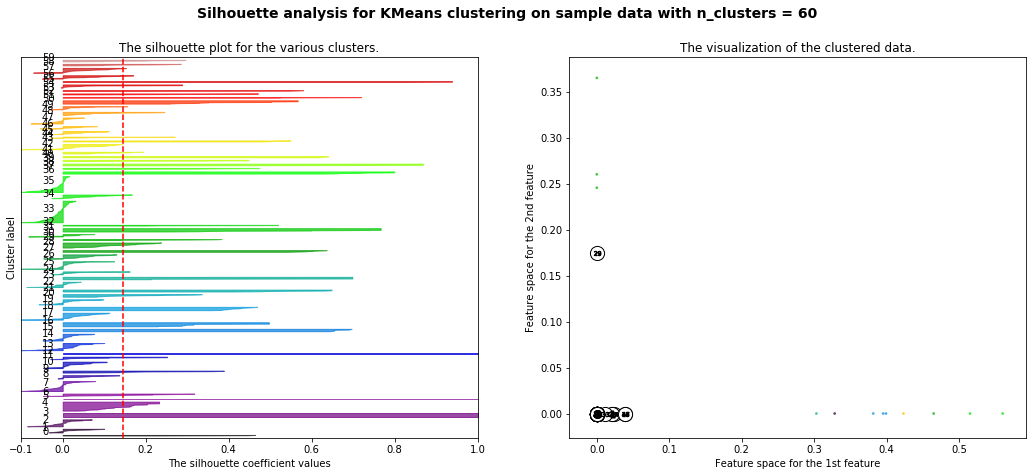

In [21]:
# analyser TFIDF
min = cluster_optimal_number
max = cluster_optimal_number+1
clusterer.silhouette_analyser(X.toarray(), min, max)

In [22]:
def sentiment(df):
    sentiment_analyser = VaderSentimentAnalyser()
    sentiments = sentiment_analyser.get_sentiment(clean_tweets)
    df['sentiment'] = sentiments
    df.sort_values(by=['cluster'], inplace=True, ascending=True)
    print(df.groupby(['cluster'])['sentiment'].mean())
    print(df.nsmallest(20, 'sentiment'))
    print(df.nlargest(20, 'sentiment'))
    
    

In [23]:
def topWords(df, clusterNum):
#find 10 most frequent words for each cluster
# vars
    clusterNumber = clusterNum
    clusterStr = ["" for i in range(clusterNumber)]
    topTex = [[] for i in range(clusterNumber)]
    clusterSent =[0 for i in range(clusterNumber)]
    for index in range(len(clean_tweets)):
        cluster = df.at[index, 'cluster']
        string = clusterStr[cluster]
        string += str(df.at[index, 'tweets'])
        string += " "
        clusterStr[cluster] = string
    # sort 
    # clean and count words in 
    for index in range(clusterNumber):
        liste1 = ["", clusterStr[index]]
        vocabDicFreq2, vocabDic2, clean_tweets2 = cleaner.clean_tweets(liste1, 0)
        sortedDicFreq = {k: v for k, v in sorted(vocabDicFreq2.items(), key=lambda item: item[1], reverse=True)}
        liste = list(sortedDicFreq.keys())
        topTex[index] = liste[:10]
    for index in range(clusterNumber):
        print("Cluster ", index, " top 10: ", topTex[index])


In [24]:
# create dataframe
dictClusterTweets = {'cluster':cluster_assignments, 'tweets':clean_tweets}
df = pd.DataFrame(dictClusterTweets)
df['Counts'] = df.groupby(['cluster']).transform('count')
pd.options.display.max_colwidth = 4000
pd.set_option('display.max_rows', df.shape[0]+1)

topWords(df, cluster_optimal_number)
sentiment(df)

Cluster  0  top 10:  ['iphone', 'apple', 'unlocked', 'smartphone', '16gb', '64gb', 'gsm', 'watch', 'count', '128gb']
Cluster  1  top 10:  ['dynamic', 'portrait', 'iphone', 'user', 'cyberart', '', 'surprising', 'forgotten', 'small', 'remarkable']
Cluster  2  top 10:  ['iphone', 'iphonexsmax', 'iphonexs', 'iphonexr', 'apple', 'iphonex', 'iphone11', 'iphone11promax', 'free', 'replace']
Cluster  3  top 10:  ['iphone', 'looking', 'jobely', '', 'app', 'look', 'check']
Cluster  4  top 10:  ['found', 'roboticode', 'android', 'iphone', 'kindle', 'dailyinspiration', 'bible', 'verse', 'daily', 'prayers']
Cluster  5  top 10:  ['iphone', 'iphones', '8plus', 'jaiiryda', 'dm', 'inquiries', 'check', 'us', 'web', 'free']
Cluster  6  top 10:  ['apple', 'release', 'least', 'new', 'iphones', 'year', 'iphone', 'iphone12', 'timcook', '']
Cluster  7  top 10:  ['']
Cluster  8  top 10:  ['iphone', 'case', 'apple', 'xs', 'samsung', 'phone', 'xr', 'max', 'galaxy', 'available']
Cluster  9  top 10:  ['app', 'iphon